In [1]:
import numpy as np
import astropy.io.fits
import scipy
import sklearn.ensemble
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier,RidgeClassifier,SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit



hdulist = fits.open('osc+otc-Assembled.fits')
cols = hdulist[1].columns

In [2]:

two_mass_ks = hdulist[1].data['NED_2MASS_Ks']
two_mass_ks_err =hdulist[1].data['NED_2MASS_Ks_Err']
two_mass_j = hdulist[1].data['NED_2MASS_J']
two_mass_j_err = hdulist[1].data['NED_2MASS_J_Err']
two_nass_h = hdulist[1].data['NED_2MASS_H']
two_nass_h_err = hdulist[1].data['NED_2MASS_H_Err']
sdss_u = hdulist[1].data['NED_SDSS_u']
sdss_u_err = hdulist[1].data['NED_SDSS_u_Err']
sdss_g = hdulist[1].data['NED_SDSS_g']
sdss_g_err = hdulist[1].data['NED_SDSS_g_Err']
sdss_r = hdulist[1].data['NED_SDSS_r']
sdss_r_err = hdulist[1].data['NED_SDSS_r_Err']
sdss_i = hdulist[1].data['NED_SDSS_i']
sdss_i_err = hdulist[1].data['NED_SDSS_i_Err']
sdss_z = hdulist[1].data['NED_SDSS_z']
sdss_z_err = hdulist[1].data['NED_SDSS_z_Err']
galex_nuv = hdulist[1].data['NED_GALEX_NUV']
galex_nuv_err = hdulist[1].data['NED_GALEX_NUV_Err']
galex_fuv = hdulist[1].data['NED_GALEX_FUV']
galex_fuv_err = hdulist[1].data['NED_GALEX_FUV_Err']
iras_12m = hdulist[1].data['NED_IRAS_12m']
iras_12m_err = hdulist[1].data['NED_IRAS_12m_Err']
iras_25m = hdulist[1].data['NED_IRAS_25m']
iras_25m_err = hdulist[1].data['NED_IRAS_25m_Err']
iras_60m = hdulist[1].data['NED_IRAS_60m']
iras_60m_err = hdulist[1].data['NED_IRAS_60m_Err']
iras_100m = hdulist[1].data['NED_IRAS_100m']
iras_100m_err = hdulist[1].data['NED_IRAS_100m_Err']
#host_z = hdulist[1].data['Host_z']
allwise_w1 = hdulist[1].data['ALLWISE_W1']
allwise_w2 = hdulist[1].data['ALLWISE_W2']
allwise_w3 = hdulist[1].data['ALLWISE_W3']
allwise_w4 = hdulist[1].data['ALLWISE_W4']
redshift = hdulist[1].data['redshift']

sn_data = hdulist[1].data
sn_type = {'Ia': 0, 'Ia-91T': 1, 'Ia-91bg': 2, 'Ca rich': 3,
'Ia-02cx':4, 'Ia-csm': 5, 'IIP':6, 'IIn': 7, 'Ib': 8, 'Ic': 9,
'Ic-BL': 10, 'SLSN-II': 11, 'SLSN-I': 12, 'LGRB': 13, 'TDE':14}
map_array = []
map_array_spec = []

sdss_u_filtered=[]
sdss_g_filtered=[]
sdss_r_filtered=[]
sdss_i_filtered=[]
sdss_z_filtered=[]
galex_nuv_filtered=[]
galex_fuv_filtered=[]
allwise_w1_filtered=[]
allwise_w2_filtered=[]
allwise_w3_filtered=[]
allwise_w4_filtered=[]
host_z_filtered=[]
two_mass_j_filtered = []
firefly_chabrier_MILES_age_lightwt_filtered = []
firefly_chabrier_MILES_metallicity_lightwt_filtered = []
firefly_chabrier_MILES_mstar_filtered = []
firefly_chabrier_MILES_spm_ebv_filtered = []
mpa_jhu_oh_p50_filtered=[]
mpa_jhu_logmstar_p50_filtered=[]
mpa_jhu_logsfr_p50_filtered=[]
mpa_jhu_logspecsfr_filtered=[]
mpa_jhu_d4000_filtered=[]
mpa_jhu_halpha_filtered=[]
mpa_jhu_hdelta_filtered=[]


redshift_list=[]
for k in range(len(sn_data)):
    if str(redshift[k]) != 'nan':
        redshift_list.append(redshift[k])      

array_0 = ['nIa', 'Ia', 'Ia*', 'Ia-HV','Ia?,Ia,---','Ia,Ia?','Ia?']
array_1 = ['Ia-91T']
array_2 = ['Ia-91bg']
array_3 = ['IIb/Ib/Ic (Ca rich)', 'Ib/Ic (Ca rich)', 'Ib (Ca rich)','Ib/c']
array_4 = ['Ia CSM']
array_5 = ['Ia-02cx', 'Iax[02cx-like]']
array_6 = ['II P', 'II-p', 'II Pec', 'II P Pec', 'II?', 'II Pec?', 'IIP?', 'II','II,II?','II,II P','II P,II']
array_7 = ['IIn', 'IIn Pec', 'LBV to IIn', 'IIn-pec/LBV', 'IIn?','II,IIn']
array_8 = ['Ib', 'Ibn','Ib, Ib/c','Ibn','Ib, I','Ib?, Ib','Ib, Ia','Ib, Ic']
array_9 = ['Ic?', 'Ic-lum?', 'Ic Pec', 'Ic','Ib/c, Ic','Ic, Ic Pec, Ic BL','Ic, Ic BL','Ic Pec, Ic','Ic?, Ic']
array_10 = ['BL-Ic', 'Ic BL','Ic, Ic Pec, Ic BL','Ic, Ic BL']
array_11 = ['SLSN-II?', ]
array_12 = ['SLSN-I']
array_13 = ['LGRB','Ic,LGRB','Ic BL,Ic,LGRB','Ia Pec,Ia-91bg,Ia,LGRB','Ic BL,Ib/c,Ic,LGRB','Ic BL,Ic,Ib/c,LGRB',
           'II,IIn,LGRB','Ic BL,Ic,LGRB,Ib']
array_14 = ['TDE?,IIn', 'AGN?,TDE','SLSN,TDE','SLSN-I?,SL-II,TDE?','MS + SMBH,SLSN,TDE'
            ,'Low-mass TDE','MS + SMBH,TDE','SLSN-II,TDE','TDE?,AGN?','TDE?,TDE','TDE,II,SLSN-II'
           ,'TDE,SLSN-I,I','TDE','TDE,AGN']
array_sum= array_0+array_1+array_2+array_3+array_4+array_5+array_6+array_7+array_8+array_9+array_10+array_11+array_12+array_13+array_14

#SN_array=[array_0,array_1,array_2,array_3,array_4,array_5,array_6,array_7,array_8,array_9,array_10,array_11,array_12,array_13,array_14]
for x in array_8:
    array_sum.remove(x)

SN_array=[array_8,array_sum]

p=[]
r=[]
f1=[]
p_0=[]
r_0=[]
f1_0=[]
p_other=[]
r_other=[]
f1_other=[]

for run in range(100):
    random_small1 = 0
    random_small2 = 0
    sdss_u_filtered=[]
    sdss_g_filtered=[]
    sdss_r_filtered=[]
    sdss_i_filtered=[]
    sdss_z_filtered=[]
    galex_nuv_filtered=[]
    galex_fuv_filtered=[]
    allwise_w1_filtered=[]
    allwise_w2_filtered=[]
    allwise_w3_filtered=[]
    allwise_w4_filtered=[]
    
    for i in range(len(sn_data)):
        if (str(allwise_w1[i]) != 'nan' and str(allwise_w2[i]) != 'nan'
        and str(allwise_w3[i]) != 'nan' and str(allwise_w4[i]) != 'nan' and str(sdss_u[i]) != 'nan' and str(sdss_g[i]) != 'nan' and str(sdss_r[i]) != 'nan' 
        and str(sdss_i[i]) != 'nan' and str(sdss_z[i])!= 'nan' and str(galex_nuv[i]) != 'nan' 
        and str(galex_fuv[i]) !='nan'):
                if sn_data[i][4] in array_8:
                
                    random_small1 += 1
                
                    map_array.append(0)
                
                if sn_data[i][4] in array_sum:
                
                    random_small2 += 1
                
                    map_array.append(1)

    random_condition = 0
    map_array_new = []
    a_random = np.random.choice(random_small2+random_small1,random_small1, replace=False)

    for i in range(len(sn_data)):
        if (str(allwise_w1[i]) != 'nan' and str(allwise_w2[i]) != 'nan'
        and str(allwise_w3[i]) != 'nan' and str(allwise_w4[i]) != 'nan' and str(sdss_u[i]) != 'nan' and str(sdss_g[i]) != 'nan' and str(sdss_r[i]) != 'nan' 
        and str(sdss_i[i]) != 'nan' and str(sdss_z[i])!= 'nan' and str(galex_nuv[i]) != 'nan' 
        and str(galex_fuv[i]) !='nan'):
                if sn_data[i][4] in array_8 or sn_data[i][4] in array_sum:
                     random_condition+=1
                if sn_data[i][4] in array_8:
                
                    map_array_new.append(0)
                    sdss_u_filtered.append(sdss_u[i])
                    sdss_g_filtered.append(sdss_g[i])
                    sdss_r_filtered.append(sdss_r[i])
                    sdss_i_filtered.append(sdss_i[i])
                    sdss_z_filtered.append(sdss_z[i])
                    galex_nuv_filtered.append(galex_nuv[i])
                    galex_fuv_filtered.append(galex_fuv[i])
                    allwise_w1_filtered.append(allwise_w1[i])
                    allwise_w2_filtered.append(allwise_w2[i])
                    allwise_w3_filtered.append(allwise_w3[i])
                    allwise_w4_filtered.append(allwise_w4[i])
            
                if sn_data[i][4] in array_sum and random_condition in a_random:
                    map_array_new.append(1)
                    sdss_u_filtered.append(sdss_u[i])
                    sdss_g_filtered.append(sdss_g[i])
                    sdss_r_filtered.append(sdss_r[i])
                    sdss_i_filtered.append(sdss_i[i])
                    sdss_z_filtered.append(sdss_z[i])
                    galex_nuv_filtered.append(galex_nuv[i])
                    galex_fuv_filtered.append(galex_fuv[i])
                    allwise_w1_filtered.append(allwise_w1[i])
                    allwise_w2_filtered.append(allwise_w2[i])
                    allwise_w3_filtered.append(allwise_w3[i])
                    allwise_w4_filtered.append(allwise_w4[i])

    map_array=[]
    map_array=map_array_new              
                
    #import random
    #map_array_random = random.sample(map_array, len(map_array))

    #random_SN = []
    #while True:
    #    for i in range(len(map_array)):
    #        random_SN.append(i)
    #    if len(random_SN) >= len(map_array):
    #        break
    #random.shuffle(random_SN)
    features = [np.array(allwise_w1_filtered),
    np.array(allwise_w2_filtered),
    np.array(allwise_w3_filtered),
    np.array(allwise_w4_filtered),
    np.array(sdss_u_filtered),
    np.array(sdss_g_filtered),
    np.array(sdss_r_filtered),
    np.array(sdss_i_filtered),
    np.array(sdss_z_filtered),
    np.array(galex_fuv_filtered),
    np.array(galex_nuv_filtered),
    np.array(sdss_u_filtered)-np.array(sdss_g_filtered),
    np.array(sdss_g_filtered)-np.array(sdss_r_filtered),
    np.array(sdss_r_filtered)-np.array(sdss_i_filtered),
    np.array(sdss_i_filtered)-np.array(sdss_z_filtered),
    np.array(galex_nuv_filtered)-np.array(sdss_u_filtered),
    np.array(galex_fuv_filtered)-np.array(galex_nuv_filtered)]
         
    X = np.vstack(features).T
    y = np.array(map_array).astype(int)
    #y_random = np.array(map_array_random).astype(int)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)
    
    clf = RidgeClassifier()
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
   
    precision, recall, f1_score, support = metrics.precision_recall_fscore_support(y_test, y_pred)
    
    average_precision = 0.0
    average_recall = 0.0
    average_f1_score = 0.0
    
    for l in range(len(precision)):
        average_precision += precision[l] * support[l] / np.sum(support)
        average_recall += recall[l] * support[l] / np.sum(support)
        average_f1_score += f1_score[l] * support[l] / np.sum(support)
    
    p_0.append(precision[0])
    r_0.append(recall[0])
    f1_0.append(f1_score[0])
    p_other.append(precision[1])
    r_other.append(recall[1])
    f1_other.append(f1_score[1])
    p.append(average_precision)
    r.append(average_recall)
    f1.append(average_f1_score)
    
print np.std(f1)
print np.mean(f1)


0.0941574812795
0.730368284105


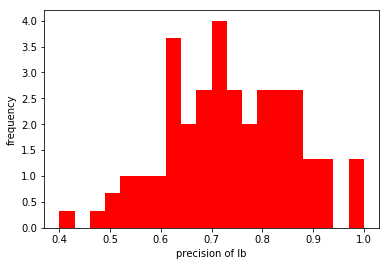

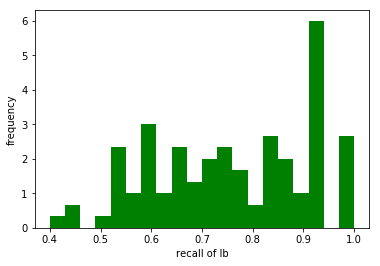

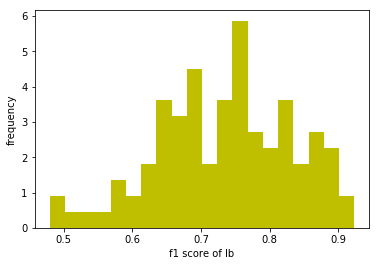

In [9]:
plt.hist(p_0, normed=True, bins=20, color='r')
plt.ylabel('frequency')
plt.xlabel('precision of Ib')
plt.show()

plt.hist(r_0, normed=True, bins=20, color='g')
plt.ylabel('frequency')
plt.xlabel('recall of Ib')
plt.show()

plt.hist(f1_0, normed=True, bins=20, color='y')
plt.ylabel('frequency')
plt.xlabel('f1 score of Ib')
plt.show()



In [4]:
p_random=[]
r_random=[]
f1_random=[]
p_0_random=[]
r_0_random=[]
f1_0_random=[]
p_other_random=[]
r_other_random=[]
f1_other_random=[]

for run in range(100):
    random_small1 = 0
    random_small2 = 0
    sdss_u_filtered=[]
    sdss_g_filtered=[]
    sdss_r_filtered=[]
    sdss_i_filtered=[]
    sdss_z_filtered=[]
    galex_nuv_filtered=[]
    galex_fuv_filtered=[]
    allwise_w1_filtered=[]
    allwise_w2_filtered=[]
    allwise_w3_filtered=[]
    allwise_w4_filtered=[]
    
    for i in range(len(sn_data)):
        if (str(allwise_w1[i]) != 'nan' and str(allwise_w2[i]) != 'nan'
        and str(allwise_w3[i]) != 'nan' and str(allwise_w4[i]) != 'nan' and str(sdss_u[i]) != 'nan' and str(sdss_g[i]) != 'nan' and str(sdss_r[i]) != 'nan' 
        and str(sdss_i[i]) != 'nan' and str(sdss_z[i])!= 'nan' and str(galex_nuv[i]) != 'nan' 
        and str(galex_fuv[i]) !='nan'):
                if sn_data[i][4] in array_8:
                
                    random_small1 += 1
                
                    map_array.append(0)
                
                if sn_data[i][4] in array_sum:
                
                    random_small2 += 1
                
                    map_array.append(1)

    random_condition = 0
    map_array_new = []
    a_random = np.random.choice(random_small2+random_small1,random_small1, replace=False)

    for i in range(len(sn_data)):
        if (str(allwise_w1[i]) != 'nan' and str(allwise_w2[i]) != 'nan'
        and str(allwise_w3[i]) != 'nan' and str(allwise_w4[i]) != 'nan' and str(sdss_u[i]) != 'nan' and str(sdss_g[i]) != 'nan' and str(sdss_r[i]) != 'nan' 
        and str(sdss_i[i]) != 'nan' and str(sdss_z[i])!= 'nan' and str(galex_nuv[i]) != 'nan' 
        and str(galex_fuv[i]) !='nan'):
                if sn_data[i][4] in array_8 or sn_data[i][4] in array_sum:
                     random_condition+=1
                if sn_data[i][4] in array_8:
                
                    map_array_new.append(0)
                    sdss_u_filtered.append(sdss_u[i])
                    sdss_g_filtered.append(sdss_g[i])
                    sdss_r_filtered.append(sdss_r[i])
                    sdss_i_filtered.append(sdss_i[i])
                    sdss_z_filtered.append(sdss_z[i])
                    galex_nuv_filtered.append(galex_nuv[i])
                    galex_fuv_filtered.append(galex_fuv[i])
                    allwise_w1_filtered.append(allwise_w1[i])
                    allwise_w2_filtered.append(allwise_w2[i])
                    allwise_w3_filtered.append(allwise_w3[i])
                    allwise_w4_filtered.append(allwise_w4[i])
            
                if sn_data[i][4] in array_sum and random_condition in a_random:
                    map_array_new.append(1)
                    sdss_u_filtered.append(sdss_u[i])
                    sdss_g_filtered.append(sdss_g[i])
                    sdss_r_filtered.append(sdss_r[i])
                    sdss_i_filtered.append(sdss_i[i])
                    sdss_z_filtered.append(sdss_z[i])
                    galex_nuv_filtered.append(galex_nuv[i])
                    galex_fuv_filtered.append(galex_fuv[i])
                    allwise_w1_filtered.append(allwise_w1[i])
                    allwise_w2_filtered.append(allwise_w2[i])
                    allwise_w3_filtered.append(allwise_w3[i])
                    allwise_w4_filtered.append(allwise_w4[i])

    map_array=[]
    map_array=map_array_new              
                
    import random
    map_array_random = random.sample(map_array, len(map_array))

    random_SN = []
    while True:
        for i in range(len(map_array)):
            random_SN.append(i)
        if len(random_SN) >= len(map_array):
            break
    random.shuffle(random_SN)
    features = [np.array(allwise_w1_filtered),
    np.array(allwise_w2_filtered),
    np.array(allwise_w3_filtered),
    np.array(allwise_w4_filtered),
    np.array(sdss_u_filtered),
    np.array(sdss_g_filtered),
    np.array(sdss_r_filtered),
    np.array(sdss_i_filtered),
    np.array(sdss_z_filtered),
    np.array(galex_fuv_filtered),
    np.array(galex_nuv_filtered),
    np.array(sdss_u_filtered)-np.array(sdss_g_filtered),
    np.array(sdss_g_filtered)-np.array(sdss_r_filtered),
    np.array(sdss_r_filtered)-np.array(sdss_i_filtered),
    np.array(sdss_i_filtered)-np.array(sdss_z_filtered),
    np.array(galex_nuv_filtered)-np.array(sdss_u_filtered),
    np.array(galex_fuv_filtered)-np.array(galex_nuv_filtered)]
         
    X = np.vstack(features).T
    y = np.array(map_array).astype(int)
    y_random = np.array(map_array_random).astype(int)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
    X, y_random, test_size=0.5, random_state=0)
    
    clf = RidgeClassifier()
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
   
    precision, recall, f1_score, support = metrics.precision_recall_fscore_support(y_test, y_pred)
    
    average_precision = 0.0
    average_recall = 0.0
    average_f1_score = 0.0
    
    for l in range(len(precision)):
        average_precision += precision[l] * support[l] / np.sum(support)
        average_recall += recall[l] * support[l] / np.sum(support)
        average_f1_score += f1_score[l] * support[l] / np.sum(support)
    
    p_0_random.append(precision[0])
    r_0_random.append(recall[0])
    f1_0_random.append(f1_score[0])
    p_other_random.append(precision[1])
    r_other_random.append(recall[1])
    f1_other_random.append(f1_score[1])
    p_random.append(average_precision)
    r_random.append(average_recall)
    f1_random.append(average_f1_score)
    
print np.std(f1_random)
print np.mean(f1_random)


0.0958450265086
0.466684556373


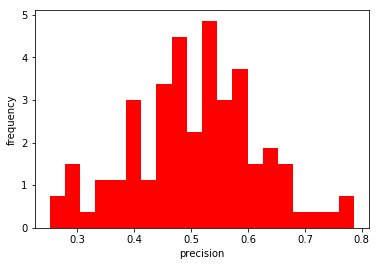

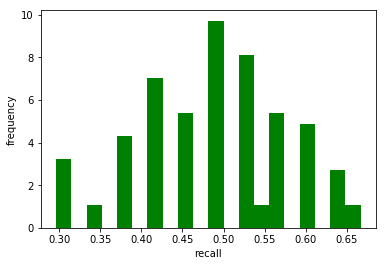

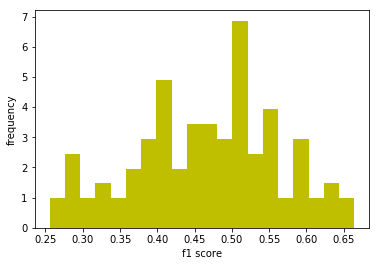

In [6]:
plt.hist(p_random, normed=True, bins=20, color='r')
plt.ylabel('frequency')
plt.xlabel('precision')
plt.show()

plt.hist(r_random, normed=True, bins=20, color='g')
plt.ylabel('frequency')
plt.xlabel('recall')
plt.show()

plt.hist(f1_random, normed=True, bins=20, color='y')
plt.ylabel('frequency')
plt.xlabel('f1 score')
plt.show()

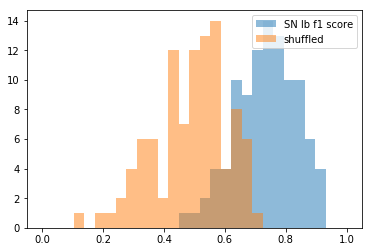

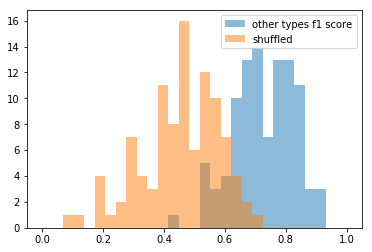

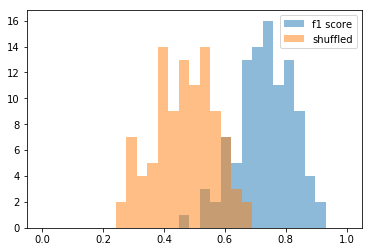

In [7]:
from matplotlib import pyplot
bins = np.linspace(0, 1, 30)


pyplot.hist(f1_0, bins, alpha=0.5, label='SN Ib f1 score')
pyplot.hist(f1_0_random, bins, alpha=0.5, label='shuffled')
pyplot.legend(loc='upper right')
pyplot.show()

pyplot.hist(f1_other, bins, alpha=0.5, label='other types f1 score')
pyplot.hist(f1_other_random, bins, alpha=0.5, label='shuffled')
pyplot.legend(loc='upper right')
pyplot.show()

pyplot.hist(f1, bins, alpha=0.5, label='f1 score')
pyplot.hist(f1_random, bins, alpha=0.5, label='shuffled')
pyplot.legend(loc='upper right')
pyplot.show()

In [10]:
array_sum= array_0+array_1+array_2+array_3+array_4+array_5+array_6+array_7+array_8+array_9+array_10+array_11+array_12+array_13+array_14

for x in array_8:
    array_sum.remove(x)

SN_array=[array_8,array_sum]

p=[]
r=[]
f1=[]
p_0=[]
r_0=[]
f1_0=[]
p_other=[]
r_other=[]
f1_other=[]
iteration = 100

feature_importance=np.zeros([iteration, 17])

for run in range(iteration):
    random_small1 = 0
    random_small2 = 0
    sdss_u_filtered=[]
    sdss_g_filtered=[]
    sdss_r_filtered=[]
    sdss_i_filtered=[]
    sdss_z_filtered=[]
    galex_nuv_filtered=[]
    galex_fuv_filtered=[]
    allwise_w1_filtered=[]
    allwise_w2_filtered=[]
    allwise_w3_filtered=[]
    allwise_w4_filtered=[]
    
    for i in range(len(sn_data)):
        if (str(allwise_w1[i]) != 'nan' and str(allwise_w2[i]) != 'nan'
        and str(allwise_w3[i]) != 'nan' and str(allwise_w4[i]) != 'nan' and str(sdss_u[i]) != 'nan' and str(sdss_g[i]) != 'nan' and str(sdss_r[i]) != 'nan' 
        and str(sdss_i[i]) != 'nan' and str(sdss_z[i])!= 'nan' and str(galex_nuv[i]) != 'nan' 
        and str(galex_fuv[i]) !='nan'):
                if sn_data[i][4] in array_8:
                
                    random_small1 += 1
                
                    map_array.append(0)
                
                if sn_data[i][4] in array_sum:
                
                    random_small2 += 1
                
                    map_array.append(1)

    random_condition = 0
    map_array_new = []
    a_random = np.random.choice(random_small2+random_small1,random_small1, replace=False)

    for i in range(len(sn_data)):
        if (str(allwise_w1[i]) != 'nan' and str(allwise_w2[i]) != 'nan'
        and str(allwise_w3[i]) != 'nan' and str(allwise_w4[i]) != 'nan' and str(sdss_u[i]) != 'nan' and str(sdss_g[i]) != 'nan' and str(sdss_r[i]) != 'nan' 
        and str(sdss_i[i]) != 'nan' and str(sdss_z[i])!= 'nan' and str(galex_nuv[i]) != 'nan' 
        and str(galex_fuv[i]) !='nan'):
                if sn_data[i][4] in array_8 or sn_data[i][4] in array_sum:
                     random_condition+=1
                if sn_data[i][4] in array_8:
                
                    map_array_new.append(0)
                    sdss_u_filtered.append(sdss_u[i])
                    sdss_g_filtered.append(sdss_g[i])
                    sdss_r_filtered.append(sdss_r[i])
                    sdss_i_filtered.append(sdss_i[i])
                    sdss_z_filtered.append(sdss_z[i])
                    galex_nuv_filtered.append(galex_nuv[i])
                    galex_fuv_filtered.append(galex_fuv[i])
                    allwise_w1_filtered.append(allwise_w1[i])
                    allwise_w2_filtered.append(allwise_w2[i])
                    allwise_w3_filtered.append(allwise_w3[i])
                    allwise_w4_filtered.append(allwise_w4[i])
            
                if sn_data[i][4] in array_sum and random_condition in a_random:
                    map_array_new.append(1)
                    sdss_u_filtered.append(sdss_u[i])
                    sdss_g_filtered.append(sdss_g[i])
                    sdss_r_filtered.append(sdss_r[i])
                    sdss_i_filtered.append(sdss_i[i])
                    sdss_z_filtered.append(sdss_z[i])
                    galex_nuv_filtered.append(galex_nuv[i])
                    galex_fuv_filtered.append(galex_fuv[i])
                    allwise_w1_filtered.append(allwise_w1[i])
                    allwise_w2_filtered.append(allwise_w2[i])
                    allwise_w3_filtered.append(allwise_w3[i])
                    allwise_w4_filtered.append(allwise_w4[i])

    map_array=[]
    map_array=map_array_new              
                
    #import random
    #map_array_random = random.sample(map_array, len(map_array))

    #random_SN = []
    #while True:
    #    for i in range(len(map_array)):
    #        random_SN.append(i)
    #    if len(random_SN) >= len(map_array):
    #        break
    #random.shuffle(random_SN)
    features = [np.array(allwise_w1_filtered),
    np.array(allwise_w2_filtered),
    np.array(allwise_w3_filtered),
    np.array(allwise_w4_filtered),
    np.array(sdss_u_filtered),
    np.array(sdss_g_filtered),
    np.array(sdss_r_filtered),
    np.array(sdss_i_filtered),
    np.array(sdss_z_filtered),
    np.array(galex_fuv_filtered),
    np.array(galex_nuv_filtered),
    np.array(sdss_u_filtered)-np.array(sdss_g_filtered),
    np.array(sdss_g_filtered)-np.array(sdss_r_filtered),
    np.array(sdss_r_filtered)-np.array(sdss_i_filtered),
    np.array(sdss_i_filtered)-np.array(sdss_z_filtered),
    np.array(galex_nuv_filtered)-np.array(sdss_u_filtered),
    np.array(galex_fuv_filtered)-np.array(galex_nuv_filtered)]
         
    X = np.vstack(features).T
    y = np.array(map_array).astype(int)
    #y_random = np.array(map_array_random).astype(int)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)
    
    clf = RandomForestClassifier()
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    importances = clf.feature_importances_ 
    
    for k in range(17):
    
        feature_importance[run][k]= importances[k]


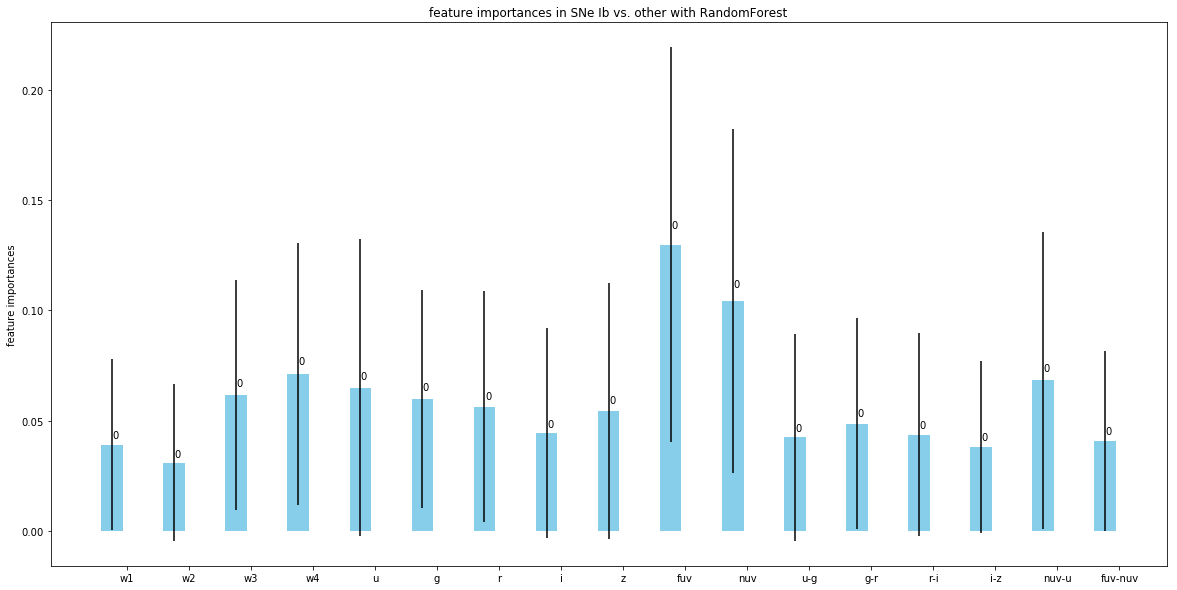

In [44]:
feature_importance_avg = np.mean(feature_importance, axis=0)
feature_importance_std = np.std(feature_importance, axis=0)


ind = np.arange(17)  

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(ind, feature_importance_avg, width=0.35, color='skyblue', yerr=feature_importance_std)
width=0.35


ax.set_ylabel('feature importances')
ax.set_title('feature importances in SNe Ib vs. other with RandomForest')
ax.set_xticks(ind + width / 1.5)
ax.set_xticklabels(('w1','w2','w3','w4','u','g','r','i','z','fuv','nuv','u-g','g-r','r-i','i-z','nuv-u','fuv-nuv'))


def autolabel(rects):
   
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/1.5, 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()